In [42]:
import pandas as pd
import numpy as np
%matplotlib inline
import sklearn.model_selection as cv
import sklearn         
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from statsmodels.stats.proportion import proportion_confint



### First we retrieve data in order to analyze it


In [43]:
df=pd.read_csv("../datasets/NormalizedSpotifyDataset.csv",header=0) # popularity with 2 classes
df_3 = pd.read_csv("../datasets/NormalizedSpotifyDataset_3.csv",header=0) # popularity with 3 classes
df = df.iloc[: , 1:] # To delete first column
df

num_artists  release_month  release_weekday  artist_followers  \
0       -0.655325       0.323833         0.369807          3.232878   
1       -0.655325       0.640026         0.369807          0.876533   
2        0.176584       0.640026         0.369807          0.693952   
3       -0.655325       0.640026        -1.503364          2.909354   
4       -0.655325       0.007639         0.369807          0.009941   
...           ...            ...              ...               ...   
8687     1.008494      -2.205714        -0.566779         -0.461887   
8688     0.176584       0.007639         0.369807         -0.469022   
8689     0.176584      -0.624747         0.369807         -0.406106   
8690     0.176584      -0.940941         0.369807         -0.346908   
8691    -0.655325      -0.308554        -2.439949         -0.377774   

      artist_popularity  danceability    energy       key  loudness      mode  \
0              2.327814      0.576809  0.947029 -1.424277  0.936815  0.745489   
1              2.051966      0.106167 -0.278086  0.537304  0.241737 -1.341401   
2              1.776118     -0.495479  0.467954 -0.023148  0.621806 -1.341401   
3              1.684169     -0.345067 -0.596250 -0.303374  0.209933  0.745489   
4              1.316371      0.979523  0.204646  0.257078  0.460145 -1.341401   
...                 ...           ...       ...       ...       ...       ...   
8687          -1.809906     -0.645890 -0.833959 -0.863826 -0.072876  0.745489   
8688          -1.074311      0.581661  0.332643  0.817530  0.259289 -1.341401   
8689           0.121030      0.382730  0.767833  1.097756  0.567831 -1.341401   
8690          -0.430666      0.305098 -0.581622 -1.424277  0.165723 -1.341401   
8691          -0.614565     -1.276647  0.062020  0.537304  0.153054  0.745489   

      ...  acousticness  instrumentalness  liveness   valence     tempo  \
0     ...     -0.597371         -0.522514 -0.626545  0.473094  0.085367   
1     ...     -0.960716         -0.529616  0.230180 -1.580611 -1.274780   
2     ...     -0.923429         -0.529633 -0.310034 -0.060661  1.958569   
3     ...      0.418091         -0.529633  0.230180 -1.450925 -0.478039   
4     ...     -0.766614         -0.529633  1.539162  0.994339  0.395866   
...   ...           ...               ...       ...       ...       ...   
8687  ...      0.703690         -0.529629 -0.524735 -1.023921  0.743074   
8688  ...     -0.729592         -0.529633 -0.358515  0.614873  1.524269   
8689  ...     -0.211284         -0.529633 -0.551746  0.710782 -0.725983   
8690  ...      1.013089         -0.529628 -0.606460 -0.669475  0.637473   
8691  ...     -0.787770          0.788994 -0.536509  0.297956  0.840997   

      time_signature  track_len  artist_len  duration  popularity  
0           0.258505  -0.758377   -0.198783  0.038276           1  
1           0.258505  -0.287441   -0.016080 -0.328307           1  
2           0.258505   0.536698   -0.381487 -0.202261           1  
3           0.258505  -0.287441   -0.016080 -0.043466           1  
4          -5.303184  -0.444419   -0.564190 -0.241459           1  
...              ...        ...         ...       ...         ...  
8687        0.258505   0.105006    3.637985  0.297254           0  
8688        0.258505   0.065761   -0.016080 -0.462378           0  
8689        0.258505   0.301230   -0.016080 -0.245536           1  
8690        0.258505  -0.758377   -0.198783 -0.086639           1  
8691       -1.595392   0.026517   -1.295003  0.018334           0  

[8692 rows x 21 columns]

### Separate data from popularity


In [44]:
X = df.drop(['popularity'], axis=1)
y = df['popularity']

print(X.shape)
X.head()

(8692, 20)


num_artists  release_month  release_weekday  artist_followers  \
0    -0.655325       0.323833         0.369807          3.232878   
1    -0.655325       0.640026         0.369807          0.876533   
2     0.176584       0.640026         0.369807          0.693952   
3    -0.655325       0.640026        -1.503364          2.909354   
4    -0.655325       0.007639         0.369807          0.009941   

   artist_popularity  danceability    energy       key  loudness      mode  \
0           2.327814      0.576809  0.947029 -1.424277  0.936815  0.745489   
1           2.051966      0.106167 -0.278086  0.537304  0.241737 -1.341401   
2           1.776118     -0.495479  0.467954 -0.023148  0.621806 -1.341401   
3           1.684169     -0.345067 -0.596250 -0.303374  0.209933  0.745489   
4           1.316371      0.979523  0.204646  0.257078  0.460145 -1.341401   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
0    -0.597692     -0.597371         -0.522514 -0.626545  0.473094  0.085367   
1    -0.662068     -0.960716         -0.529616  0.230180 -1.580611 -1.274780   
2     1.907192     -0.923429         -0.529633 -0.310034 -0.060661  1.958569   
3    -0.562203      0.418091         -0.529633  0.230180 -1.450925 -0.478039   
4    -0.283241     -0.766614         -0.529633  1.539162  0.994339  0.395866   

   time_signature  track_len  artist_len  duration  
0        0.258505  -0.758377   -0.198783  0.038276  
1        0.258505  -0.287441   -0.016080 -0.328307  
2        0.258505   0.536698   -0.381487 -0.202261  
3        0.258505  -0.287441   -0.016080 -0.043466  
4       -5.303184  -0.444419   -0.564190 -0.241459

### Let's check how random is our model using cross validation score

In [52]:
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def list_of_percentatges(value_list):
    return [ '{0:.0%}'.format(value) for value in value_list]

cv_scores = cross_val_score(tree.DecisionTreeClassifier(),  
                            X=X,  
                            y=y,  
                            cv=10, scoring='accuracy')
print(f"{[ '{0:.0%}'.format(score) for score in cv_scores]}")
print(f'Mean: {np.mean(cv_scores)}')

['67%', '74%', '85%', '64%', '63%', '70%', '65%', '86%', '78%', '63%']
Mean: 0.7150386673022935


### Let's train a Decision Tree, but our results seems to be random

In [123]:
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',  max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
pred = clf.fit(X_train, y_train).predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, pred))
print()
print("Accuracy on test set:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Confidence interval: ",proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

## Print tree
fig = plt.gcf()
fig.set_size_inches(200, 100)

tree.plot_tree(clf, filled=True,rounded=True,feature_names=list(df.columns.values))
fig.savefig('tree.png')
plt.show()

[[1093  283]
 [ 362  870]]

Accuracy on test set: 0.7526840490797546

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1376
           1       0.75      0.71      0.73      1232

    accuracy                           0.75      2608
   macro avg       0.75      0.75      0.75      2608
weighted avg       0.75      0.75      0.75      2608

Confidence interval:  (0.7356484033803494, 0.7690109693583893)


Feature importance

[('release_month', 0.20334234370561144), ('artist_popularity', 0.13249283246713378), ('artist_len', 0.08492139754404722), ('acousticness', 0.06756401844424334), ('speechiness', 0.05320244094128082), ('artist_followers', 0.050957148710706675), ('valence', 0.05008221078584739), ('liveness', 0.04940994579975822), ('danceability', 0.04583538268007526), ('duration', 0.0449269367017599), ('energy', 0.04000834269796621), ('tempo', 0.03583328427493428), ('loudness', 0.03326963746315428), ('track_len', 0.028224867900817147), ('instrumentalness', 0.02534804352994538), ('key', 0.021893079115067184), ('release_weekday', 0.014409403903776515), ('num_artists', 0.008337666179052183), ('mode', 0.0064111735534662425), ('time_signature', 0.003529843601356437)]


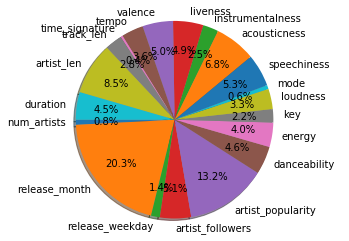

In [121]:
print("Feature importance\n")
features = {}
for feature, importance in zip(X.columns, clf.feature_importances_ ): #list_of_percentatges(clf.feature_importances_)
    features[feature] = importance
    
features_list = (sorted(features.items(), key=lambda x: x[1], reverse=True))

print(features_list)
# Data to plot
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(clf.feature_importances_, autopct='%1.1f%%', labels = X.columns, shadow=True, pctdistance=0.7, startangle=180)
plt.axis('equal')
plt.show()


In [124]:
# Using the last tree built
scores = sklearn.model_selection.cross_val_score(clf, X, y, cv=10)
print(f"{[ '{0:.0%}'.format(score) for score in cv_scores]}")
print(f'Mean: {np.mean(cv_scores)}')

['67%', '74%', '85%', '64%', '63%', '70%', '65%', '86%', '78%', '63%']
Mean: 0.7150386673022935


In [125]:
predicted = cross_val_predict(tree.DecisionTreeClassifier(criterion='entropy',  max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5), X=X, y=y,  cv=10)  
print(sklearn.metrics.confusion_matrix(y, predicted))
print(sklearn.metrics.accuracy_score(y, predicted))

# We obtain a better accuracy

[[3511 1075]
 [1122 2984]]
0.7472388403129314


In [139]:
from sklearn.model_selection import GridSearchCV
params = {
    'min_impurity_decrease': list(np.linspace(0,0.5,21)),
    'min_samples_split':list(range(2,20,11)),
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 6, 7, 8, 9, 10],
    'max_features': [4, 8, 12, 16, 20],
    'max_leaf_nodes': [5, 10, 15, 20]
}
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
grid.fit(X_train, y_train)
print("Best Params=",grid.best_params_, "Accuracy=", grid.best_score_)

# 
# best_params = clf.best_params_

Best Params= {'criterion': 'gini', 'max_depth': 8, 'max_features': 20, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'splitter': 'best'} Accuracy= 0.7850098619329389


In [140]:
scores = grid.cv_results_["mean_test_score"]
print(f"{[ '{0:.0%}'.format(score) for score in scores]}")
print(f'Mean: {np.mean(scores)}')

['69%', '62%', '69%', '66%', '67%', '58%', '67%', '57%', '61%', '54%', '64%', '56%', '59%', '56%', '63%', '53%', '63%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '73%', '65%', '73%', '65%', '69%', '55%', '69%', '56%', '62%', '54%', '62%', '54%', '60%', '54%', '60%', '53%', '53%', '55%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%', '53%'

In [149]:
# Function to plot the confusion matrix
import itertools

def plot_confusion_matrix(base_confusion_matrix, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        base_confusion_matrix = base_confusion_matrix.astype('float') / base_confusion_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(base_confusion_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = base_confusion_matrix.max() / 2.
    for i, j in itertools.product(range(base_confusion_matrix.shape[0]), range(base_confusion_matrix.shape[1])):
        plt.text(j, i, format(base_confusion_matrix[i, j], fmt),
                 color="white" if base_confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True digit')
    plt.xlabel('Predicted digit')


{'criterion': 'gini', 'max_depth': 8, 'max_features': 20, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy on test set: 0.763420245398773
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1376
           1       0.77      0.71      0.74      1232

    accuracy                           0.76      2608
   macro avg       0.76      0.76      0.76      2608
weighted avg       0.76      0.76      0.76      2608

Confidence interval:  (0.7461945795438863, 0.7791743272945427)


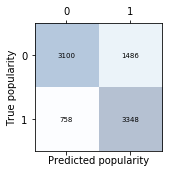

In [164]:
# Plot the tree with the best params
"""
Best params
'criterion': 'gini', -> default
'max_depth': 7,
'max_features': 16,
'max_leaf_nodes': 20,
'min_impurity_decrease': 0.0, -> default
'min_samples_split': 2, -> default
'splitter': 'best' -> default
"""
print(grid.best_params_)
clf = tree.DecisionTreeClassifier(
    criterion = grid.best_params_['criterion'],
    max_depth = grid.best_params_['max_depth'],
    max_features = grid.best_params_['max_features'],
    max_leaf_nodes = grid.best_params_['max_leaf_nodes'],
    min_impurity_decrease = grid.best_params_['min_impurity_decrease'],
    min_samples_split = grid.best_params_['min_samples_split'],
    splitter = grid.best_params_['splitter']
)

pred = clf.fit(X_train, y_train).predict(X_test)

print("Accuracy on test set:", sklearn.metrics.accuracy_score(y_test, pred))
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Confidence interval: ",proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))
    
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

plt.xlabel('Predicted popularity')
plt.ylabel('True popularity')

plt.tight_layout()
plt.savefig('ConMatrix.png', dpi=600)
plt.show()


## Print tree
fig = plt.gcf()
fig.set_size_inches(200, 100)

tree.plot_tree(clf, filled=True,rounded=True,feature_names=X.columns)
fig.savefig('tree_bestparams.png')
plt.show()

Feature importance

[('release_month', 0.5491547699650239), ('artist_popularity', 0.2966073442961163), ('acousticness', 0.05164985980227353), ('artist_followers', 0.050471836023205624), ('danceability', 0.01866628104672624), ('artist_len', 0.00788914090108473), ('duration', 0.007426036346646749), ('energy', 0.007306098399304595), ('release_weekday', 0.0054344687891966234), ('track_len', 0.005394164430421692), ('num_artists', 0.0), ('key', 0.0), ('loudness', 0.0), ('mode', 0.0), ('speechiness', 0.0), ('instrumentalness', 0.0), ('liveness', 0.0), ('valence', 0.0), ('tempo', 0.0), ('time_signature', 0.0)]


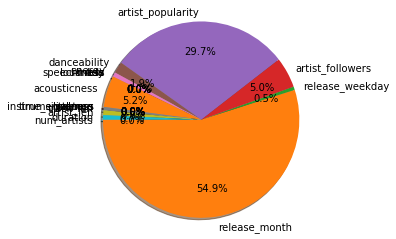

In [144]:
print("Feature importance\n")
features = {}
for feature, importance in zip(X.columns, clf.feature_importances_ ): #list_of_percentatges(clf.feature_importances_)
    features[feature] = importance
    
features_list = (sorted(features.items(), key=lambda x: x[1], reverse=True))

print(features_list)
# Data to plot
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(clf.feature_importances_, autopct='%1.1f%%', labels = X.columns, shadow=True, pctdistance=0.7, startangle=180)
plt.axis('equal')
plt.show()

In [192]:
# With the best param. We do a cross validation predict
classifier = tree.DecisionTreeClassifier(
    criterion = grid.best_params_['criterion'],
    max_depth = grid.best_params_['max_depth'],
    max_features = grid.best_params_['max_features'],
    max_leaf_nodes = grid.best_params_['max_leaf_nodes'],
    min_impurity_decrease = grid.best_params_['min_impurity_decrease'],
    min_samples_split = grid.best_params_['min_samples_split'],
    splitter = grid.best_params_['splitter']
)
predicted = cross_val_predict(classifier, X=X, y=y,  cv=10)  
print(sklearn.metrics.accuracy_score(y, predicted))



0.7418315692590888


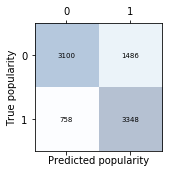

In [193]:
confmat = sklearn.metrics.confusion_matrix(y, predicted)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

plt.xlabel('Predicted popularity')
plt.ylabel('True popularity')

plt.tight_layout()
plt.savefig('ConMatrix.png', dpi=600)
plt.show()

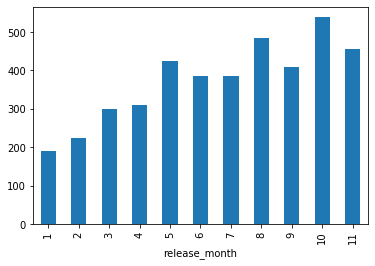

In [180]:
# Is really the release month decisive
data = pd.read_csv('../datasets/SpotifyDataset.csv', header = 0)
data.head()
populares = data.loc[df['popularity'] == 1]
populares.groupby('release_month')["popularity"].count().plot(kind = 'bar')

